In [6]:
import pandas as pd
import os

In [19]:
%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 11.1 MB 4.5 MB/s eta 0:00:01
     |████████████████████████████████| 301 kB 40.0 MB/s eta 0:00:01
     |████████████████████████████████| 30.3 MB 1.6 MB/s  eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [9]:
file_path = "csvs/ALQ_G.csv"

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 294 kB 1.2 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


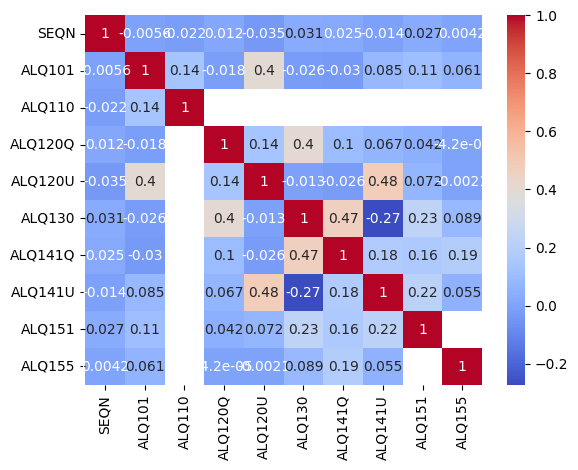

In [21]:
df = pd.read_csv(file_path)
import seaborn as sns
#//create a heat map using seaborn

f = sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [12]:
len(df)

5615

In [14]:
df.count()

SEQN       5615
ALQ101     4977
ALQ110     1400
ALQ120Q    4188
ALQ120U    3327
ALQ130     3334
ALQ141Q    3334
ALQ141U    1383
ALQ151     4186
ALQ155      655
dtype: int64